In [21]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


# Get the final dataset

**Goal:** bla

This notebook is divided in ? parts:
* **1 .Bla**: bla

**Refs:**
* [`first_analysis.ipynb`](https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/180731_pierre/first_analysis.ipynb)
* [`click_annotvcf_annotations_analysis.ipynb`](https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/180731_pierre/click_annotvcf_annotations_analysis.ipynb)

In [22]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

In [23]:
impact <- read.table("../../../data/all_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

## Get click_annotvcf annotations

Get the features from `click_annotvcf_IMPACT_mutations_180508.txt` (impact annotated by the click_annotvcf pipeline).

### Get the raw data

In [24]:
impact_annotated <- read.table("../../../data/annotate_with_click_annotvcf_test/click_annotvcf_IMPACT_mutations_180508.txt",
                               sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment = "#")

In [25]:
ncol(impact_annotated)
nrow(impact_annotated)
head(impact_annotated)

[1] 156

[1] 406833

ID_VARIANT    TARGET_NAME REFERENCE_NAME CHR START   END     REF ALT
1 1_2487766_T_C NA          NA             1   2487766 2487766 T   C  
2 1_2487954_G_A NA          NA             1   2487954 2487954 G   A  
3 1_2487984_C_A NA          NA             1   2487984 2487984 C   A  
4 1_2487998_C_G NA          NA             1   2487998 2487998 C   G  
5 1_2487998_C_T NA          NA             1   2487998 2487998 C   T  
6 1_2488032_A_G NA          NA             1   2488032 2488032 A   G  
  CONTEXT_5 CHANGE CONTEXT_3 QUAL CALLED_BY PASSED_BY NUMBER_OF_CALLERS
1 TGGAA     C      GGTGC     NA   NA        NA        0                
2 GCTCG     A      GTTCT     NA   NA        NA        0                
3 CGAGG     A      GGATT     NA   NA        NA        0                
4 TTTCT     G      TTTCT     NA   NA        NA        0                
5 TTTCT     T      TTTCT     NA   NA        NA        0                
6 CAGCA     G      TGGCG     NA   NA        NA        0                
  FLAGS_ALL TARGET_VAF_MEAN TARGET_VAF_STD REFERENCE_VAF_MEAN REFERENCE_VAF_STD
1 PASS      NA              NA             NA                 NA               
2 PASS      NA              NA             NA                 NA               
3 PASS      NA              NA             NA                 NA               
4 PASS      NA              NA             NA                 NA               
5 PASS      NA              NA             NA                 NA               
6 PASS      NA              NA             NA                 NA               
  mutect_TARGET_VAF mutect_TARGET_DEPTH mutect_REFERENCE_VAF
1 NA                NA                  NA                  
2 NA                NA                  NA                  
3 NA                NA                  NA                  
4 NA                NA                  NA                  
5 NA                NA                  NA                  
6 NA                NA                  NA                  
  mutect_REFERENCE_DEPTH mutect_DIRPROP mutect_READS_FORWARD
1 NA                     NA             NA                  
2 NA                     NA             NA                  
3 NA                     NA             NA                  
4 NA                     NA             NA                  
5 NA                     NA             NA                  
6 NA                     NA             NA                  
  mutect_READS_REVERSE strelka_TARGET_VAF strelka_TARGET_DEPTH
1 NA                   NA                 NA                  
2 NA                   NA                 NA                  
3 NA                   NA                 NA                  
4 NA                   NA                 NA                  
5 NA                   NA                 NA                  
6 NA                   NA                 NA                  
  strelka_REFERENCE_VAF strelka_REFERENCE_DEPTH caveman_TARGET_VAF
1 NA                    NA                      NA                
2 NA                    NA                      NA                
3 NA                    NA                      NA                
4 NA                    NA                      NA                
5 NA                    NA                      NA                
6 NA                    NA                      NA                
  caveman_TARGET_DEPTH caveman_REFERENCE_VAF caveman_REFERENCE_DEPTH
1 NA                   NA                    NA                     
2 NA                   NA                    NA                     
3 NA                   NA                    NA                     
4 NA                   NA                    NA                     
5 NA                   NA                    NA                     
6 NA                   NA                    NA                     
  caveman_DIRPROP caveman_READS_FORWARD caveman_READS_REVERSE CAVEMAN_DS
1 NA              NA                    NA                    NA        
2 NA              NA                    NA      

We keep the following features:
* `id_colnames`: variant identification columns (chromosome, start position, ...)
* `vag_colnames`: VAGrENT most deleterious annotation
* `vep_colnames`: VEP v92 annotations
     * `VEP_BIOTYPE`: Biotype of transcript or regulatory feature
     * ...
* `vep_add_colnames`: VEP v92 annotations (polyphen: 2.2.2, sift: sift5.2.2, COSMIC v81)
    * `VEP_IMPACT`: Subjective impact classification of consequence type
    * `VEP_CLIN_SIG`: ClinVar clinical significance of the dbSNP variant
    * `VEP_AF`: Frequency of existing variant in 1000 Genomes combined population
    * `VEP MAX_AF`: Maximum observed allele frequency in 1000 Genomes, ESP and ExAC/gnomAD
    * `VEP MAX_AF_POPS`: Populations in which maximum allele frequency was observed
    * ...

In [26]:
id_colnames  <- c("ID_VARIANT", "CHR", "START", "END", "REF", "ALT")
vag_colnames <- c("VAG_VT", "VAG_GENE", "VAG_cDNA_CHANGE", "VAG_PROTEIN_CHANGE", "VAG_EFFECT")
vep_colnames <- c("VEP_Consequence", "VEP_SYMBOL", "VEP_HGVSc", "VEP_HGVSp", "VEP_Amino_acids", "VEP_VARIANT_CLASS", "VEP_BIOTYPE")
vep_add_colnames <- c("VEP_IMPACT", "VEP_CLIN_SIG",
                       "VEP_AF", "VEP_MAX_AF", "VEP_MAX_AF_POPS", "VEP_gnomAD_AF",
                       "VEP_SIFT", "VEP_PolyPhen", "VEP_COSMIC_CNT")

colnames_to_keep <- c(id_colnames, vag_colnames, vep_colnames, vep_add_colnames)

impact_annotated <- impact_annotated[, colnames_to_keep]

In [27]:
impact_vcf <- read.table("../../../data/annotate_with_click_annotvcf_test/all_IMPACT_mutations_180508.vcf",
                               sep = "\t", stringsAsFactors = FALSE, header = FALSE, comment = "#")
colnames(impact_vcf) <- c("CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT")

In [28]:
ncol(impact_vcf)
nrow(impact_vcf)
head(impact_vcf)

[1] 9

[1] 406833

CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT
1,16265908,.,A,T,.,.,OLD_REF_ALT_POS=A/T/16265908,.
2,29543736,.,A,G,.,.,OLD_REF_ALT_POS=A/G/29543736,.
2,242793433,.,G,A,.,.,OLD_REF_ALT_POS=G/A/242793433,.
5,56177843,.,C,G,.,.,OLD_REF_ALT_POS=C/G/56177843,.
5,180030313,.,C,A,.,.,OLD_REF_ALT_POS=C/A/180030313,.
5,180051003,.,T,C,.,.,OLD_REF_ALT_POS=T/C/180051003,.


In [29]:
dd <- head(unique(impact_vcf$INFO), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][1]),
                 sapply(dd, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][2]),
                 sapply(dd, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][3]),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2", "new_3")
dd

old,new1,new2,new_3
OLD_REF_ALT_POS=A/T/16265908,A,T,16265908
OLD_REF_ALT_POS=A/G/29543736,A,G,29543736
OLD_REF_ALT_POS=G/A/242793433,G,A,242793433
OLD_REF_ALT_POS=C/G/56177843,C,G,56177843
OLD_REF_ALT_POS=C/A/180030313,C,A,180030313
OLD_REF_ALT_POS=T/C/180051003,T,C,180051003
OLD_REF_ALT_POS=C/T/32178570,C,T,32178570
OLD_REF_ALT_POS=G/A/32188823,G,A,32188823
OLD_REF_ALT_POS=C/T/151945083,C,T,151945083
OLD_REF_ALT_POS=G/A/49433883,G,A,49433883


In [30]:
impact_vcf$OLD_REF <- sapply(impact_vcf$INFO, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][1])
impact_vcf$OLD_ALT <- sapply(impact_vcf$INFO, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][2])
impact_vcf$OLD_POS <- sapply(impact_vcf$INFO, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][3])
head(impact_vcf)

CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,OLD_REF,OLD_ALT,OLD_POS
1,16265908,.,A,T,.,.,OLD_REF_ALT_POS=A/T/16265908,.,A,T,16265908
2,29543736,.,A,G,.,.,OLD_REF_ALT_POS=A/G/29543736,.,A,G,29543736
2,242793433,.,G,A,.,.,OLD_REF_ALT_POS=G/A/242793433,.,G,A,242793433
5,56177843,.,C,G,.,.,OLD_REF_ALT_POS=C/G/56177843,.,C,G,56177843
5,180030313,.,C,A,.,.,OLD_REF_ALT_POS=C/A/180030313,.,C,A,180030313
5,180051003,.,T,C,.,.,OLD_REF_ALT_POS=T/C/180051003,.,T,C,180051003


In [31]:
impact_vcf$join_key <- paste(impact_vcf$CHROM, impact_vcf$POS, impact_vcf$REF, impact_vcf$ALT, sep = '_')
head(impact_vcf$join_key)

[1] "1_16265908_A_T"  "2_29543736_A_G"  "2_242793433_G_A" "5_56177843_C_G" 
[5] "5_180030313_C_A" "5_180051003_T_C"

**Verification 1** The features are unique for each `join_key`:

In [32]:
impact_vcf <- unique(impact_vcf)
nrow(dd <- impact_vcf %>% group_by(join_key) %>% filter(n() > 1))

[1] 126

In [33]:
head(dd[order(dd$join_key),])

CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,OLD_REF,OLD_ALT,OLD_POS,join_key
1,2494203,.,CAGG,C,.,.,OLD_REF_ALT_POS=CAGG/C/2494203,.,CAGG,C,2494203,1_2494203_CAGG_C
1,2494203,.,CAGG,C,.,.,OLD_REF_ALT_POS=AGG/-/2494204,.,AGG,-,2494204,1_2494203_CAGG_C
1,27099954,.,AC,A,.,.,OLD_REF_ALT_POS=AC/A/27099954,.,AC,A,27099954,1_27099954_AC_A
1,27099954,.,AC,A,.,.,OLD_REF_ALT_POS=C/-/27099955,.,C,-,27099955,1_27099954_AC_A
1,27106470,.,ACCACTAACTT,A,.,.,OLD_REF_ALT_POS=CCACTAACTT/-/27106471,.,CCACTAACTT,-,27106471,1_27106470_ACCACTAACTT_A
1,27106470,.,ACCACTAACTT,A,.,.,OLD_REF_ALT_POS=ACCACTAACTT/A/27106470,.,ACCACTAACTT,A,27106470,1_27106470_ACCACTAACTT_A


63 mutations so ...

In [34]:
#head(dd %>% group_by(join_key) %>% summarise(count = n(), can = sum(OLD_REF == '-' | OLD_ALT == '-')))

In [35]:
#not_unique <- which(impact_vcf$join_key %in% dd$join_key)
#impact_vcf[not_unique,] <- impact_vcf[not_unique,] %>% group_by(join_key) %>% filter(OLD_REF == '-' | OLD_ALT == '-')

In [36]:
#impact_vcf <- unique(impact_vcf)
#nrow(dd <- impact_vcf %>% group_by(join_key) %>% filter(n() > 1))

**Verification 2** Make sure every `impact_annotated` `ID_VARIANT` has an analoguous `join_key` in `impact_vcf`:

In [37]:
impact_annotated[impact_annotated$ID_VARIANT == "1_2494203_CAGG_C",]

,ID_VARIANT,CHR,START,END,REF,ALT,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT
401,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,retained_intron,MODIFIER,NA,0.0012,0.004,EUR,NA,NA,NA,NA
402,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,retained_intron,MODIFIER,NA,0.0012,0.004,EUR,NA,NA,NA,NA


In [38]:
impact_annotated <- unique(impact_annotated)
nrow(impact_annotated)


  TRUE 
406770 

In [39]:
table(impact_annotated$ID_VARIANT %in% impact_vcf$join_key)

[1] 406770

In [40]:
impact_annotated <- left_join(impact_annotated, impact_vcf[, c("join_key", "OLD_REF", "OLD_ALT", "OLD_POS")],
                              by = c("ID_VARIANT" = "join_key"))

In [41]:
nrow(impact_annotated)

[1] 406833

In [42]:
head(impact_annotated)

ID_VARIANT,CHR,START,END,REF,ALT,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,OLD_REF,OLD_ALT,OLD_POS
1_2487766_T_C,1,2487766,2487766,T,C,Sub,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,RP3-395M20.8,ENST00000416860.2:n.405A>G,NA,NA,SNV,antisense,MODIFIER,NA,NA,7.504e-01,AFR,5.321e-01,NA,NA,NA,T,C,2487766
1_2487954_G_A,1,2487954,2487954,G,A,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-150G>A,NA,NA,SNV,protein_coding,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,G,A,2487954
1_2487984_C_A,1,2487984,2487984,C,A,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-120C>A,NA,NA,SNV,protein_coding,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,C,A,2487984
1_2487998_C_G,1,2487998,2487998,C,G,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-106C>G,NA,NA,SNV,protein_coding,MODIFIER,NA,NA,1.732e-05,gnomAD_NFE,6.670e-06,NA,NA,NA,C,G,2487998
1_2487998_C_T,1,2487998,2487998,C,T,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-106C>T,NA,NA,SNV,protein_coding,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,C,T,2487998
1_2488032_A_G,1,2488032,2488032,A,G,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-72A>G,NA,NA,SNV,protein_coding,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,A,G,2488032


In [43]:
impact_annotated[impact_annotated$ID_VARIANT == "1_2494203_CAGG_C",]

,ID_VARIANT,CHR,START,END,REF,ALT,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,OLD_REF,OLD_ALT,OLD_POS
401,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,retained_intron,MODIFIER,NA,0.0012,0.004,EUR,NA,NA,NA,NA,CAGG,C,2494203
402,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,retained_intron,MODIFIER,NA,0.0012,0.004,EUR,NA,NA,NA,NA,AGG,-,2494204


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_annotated`. The keys will be: 
* `mut_key` for `impact`
* `CHR`\_`START`\_`REF`\_`ALT` for `impact_annotated`, however because the file was annotated from `impact` converted to `.vcf` format, there's a correction to be made for `INS` and `DEL` (ex: for insertions the syntax is `-/A` for `impact` vs `T/TA` for `impact_annotated`).

In [44]:
impact_annotated$join_key <- paste(impact_annotated$CHR, impact_annotated$OLD_POS, impact_annotated$OLD_REF, impact_annotated$OLD_ALT, sep = '_')
head(impact_annotated$join_key)
impact$mut_key <- paste(impact$Chromosome,
                        impact$Start_Position,
                        impact$Reference_Allele,
                        impact$Tumor_Seq_Allele2,
                        sep = '_')
head(impact$mut_key)

[1] "1_2487766_T_C" "1_2487954_G_A" "1_2487984_C_A" "1_2487998_C_G"
[5] "1_2487998_C_T" "1_2488032_A_G"

[1] "1_16265908_A_T"  "2_29543736_A_G"  "2_242793433_G_A" "5_56177843_C_G" 
[5] "5_180030313_C_A" "5_180051003_T_C"

**Verification 1** Make sure every impact `mut_key` has an analoguous `join_key` in `impact_annotated`:

In [45]:
table(impact$mut_key %in% impact_annotated$join_key)


  TRUE 
588547 

**Verification 2** The features are unique for each `join_key`:

In [46]:
impact_annotated <- unique(impact_annotated)
nrow(impact_annotated %>% group_by(join_key) %>% filter(n() > 1))

[1] 0

In [47]:
colnames_to_keep <- c(vag_colnames, vep_colnames, vep_add_colnames)

In [48]:
impact[, colnames_to_keep] <- left_join(impact, impact_annotated,
                                        by = c("mut_key" = "join_key"))[, c(vag_colnames, vep_colnames, vep_add_colnames)]

In [56]:
head(impact)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,sample_coverage,minor_contamination,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT
SPEN,1,16265908,16265908,nonsynonymous_SNV,SNP,A,A,T,P-0000004-T01-IM3,A,A,c.10981A>T,p.I3661F,473,0.15433,73,1071,0.00000,0,166,234,37,36,0,AUTO_OK,428,0.03556,1_16265908_A_T,Sub,SPEN,c.10981A>T,p.I3661F,non_synonymous_codon,missense_variant,SPEN,ENST00000375759.3:c.10981A>T,ENSP00000364912.3:p.Ile3661Phe,I/F,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,deleterious(0),probably_damaging(0.976),NA
ALK,2,29543736,29543736,nonsynonymous_SNV,SNP,A,A,G,P-0000004-T01-IM3,A,A,c.1427T>C,p.V476A,193,0.06736,13,793,0.00000,0,78,102,3,10,0,UNLIKELY,428,0.03556,2_29543736_A_G,Sub,ALK,c.1427T>C,p.V476A,non_synonymous_codon,missense_variant,ALK,ENST00000389048.3:c.1427T>C,ENSP00000373700.3:p.Val476Ala,V/A,SNV,protein_coding,MODERATE,benign&likely_benign,0.0160,0.05297,gnomAD_ASJ,0.02858,tolerated(0.91),benign(0),1
PDCD1,2,242793433,242793433,nonsynonymous_SNV,SNP,G,G,A,P-0000004-T01-IM3,G,G,c.644C>T,p.A215V,240,0.06250,15,712,0.00140,1,89,136,5,10,0,UNLIKELY,428,0.03556,2_242793433_G_A,Sub,PDCD1,c.644C>T,p.A215V,non_synonymous_codon,missense_variant,PDCD1,ENST00000334409.5:c.644C>T,ENSP00000335062.5:p.Ala215Val,A/V,SNV,protein_coding,MODERATE,NA,0.1368,0.49020,gnomAD_EAS,0.09123,tolerated(0.27),benign(0.261),2
MAP3K1,5,56177843,56177843,nonsynonymous_SNV,SNP,C,C,G,P-0000004-T01-IM3,C,C,c.2816C>G,p.S939C,382,0.03141,12,666,0.00000,0,200,170,8,4,0,UNLIKELY,428,0.03556,5_56177843_C_G,Sub,MAP3K1,c.2816C>G,p.S939C,non_synonymous_codon,missense_variant,MAP3K1,ENST00000399503.3:c.2816C>G,ENSP00000382423.3:p.Ser939Cys,S/C,SNV,protein_coding,MODERATE,NA,0.0074,0.04344,gnomAD_ASJ,0.01570,tolerated_low_confidence(0.08),benign(0.078),NA
FLT4,5,180030313,180030313,nonsynonymous_SNV,SNP,C,C,A,P-0000004-T01-IM3,C,C,c.3971G>T,p.R1324L,385,0.06494,25,1112,0.00270,3,182,178,12,13,0,UNLIKELY,428,0.03556,5_180030313_C_A,Sub,FLT4,c.3971G>T,p.R1324L,non_synonymous_codon,missense_variant,FLT4,ENST00000261937.6:c.3971G>T,ENSP00000261937.6:p.Arg1324Leu,R/L,SNV,protein_coding,MODERATE,benign&likely_benign,NA,0.11000,gnomAD_NFE,0.07872,tolerated_low_confidence(0.65),benign(0),1
FLT4,5,180051003,180051003,nonsynonymous_SNV,SNP,T,T,C,P-0000004-T01-IM3,T,T,c.1480A>G,p.T494A,295,0.07458,22,977,0.00102,1,116,157,8,14,0,UNLIKELY,428,0.03556,5_180051003_T_C,Sub,FLT4,c.1480A>G,p.T494A,non_synonymous_codon,missense_variant,FLT4,ENST00000261937.6:c.1480A>G,ENSP00000261937.6:p.Thr494Ala,T/A,SNV,protein_coding,MODERATE,benign,0.0529,0.12270,EA,0.08918,tolerated(0.53),benign(0.007),1&1&1


## Adapt the get_cleaned_impact() function

### Filtering the features

In [91]:
# [-7 features] remove the unique-value features
impact[, c("Entrez_Gene_Id",
           "Center",
           "NCBI_Build",
           "Strand",
           "dbSNP_RS",
           "Matched_Norm_Sample_Barcode",
           "variant_status")] <- list(NULL)

In [96]:
# [-3 features] remove the redundant features
impact[, c("Match_Norm_Seq_Allele1", "Match_Norm_Seq_Allele2", "Tumor_Seq_Allele1")] <- list(NULL)

### Filtering the rows (over the `VEP_Consequence` feature)

In [92]:
dd <- head(unique(impact$VEP_Consequence), 20)
dd <- data.frame(dd, sapply(dd, function(x) strsplit(x, '&')[[1]][1]), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
missense_variant,missense_variant
splice_acceptor_variant,splice_acceptor_variant
stop_gained,stop_gained
splice_donor_variant,splice_donor_variant
start_lost,start_lost
frameshift_variant,frameshift_variant
splice_region_variant,splice_region_variant
inframe_deletion,inframe_deletion
inframe_insertion,inframe_insertion
stop_lost,stop_lost


In [93]:
impact$VEP_Consequence <- sapply(impact$VEP_Consequence, function(x) strsplit(x, '&')[[1]][1])

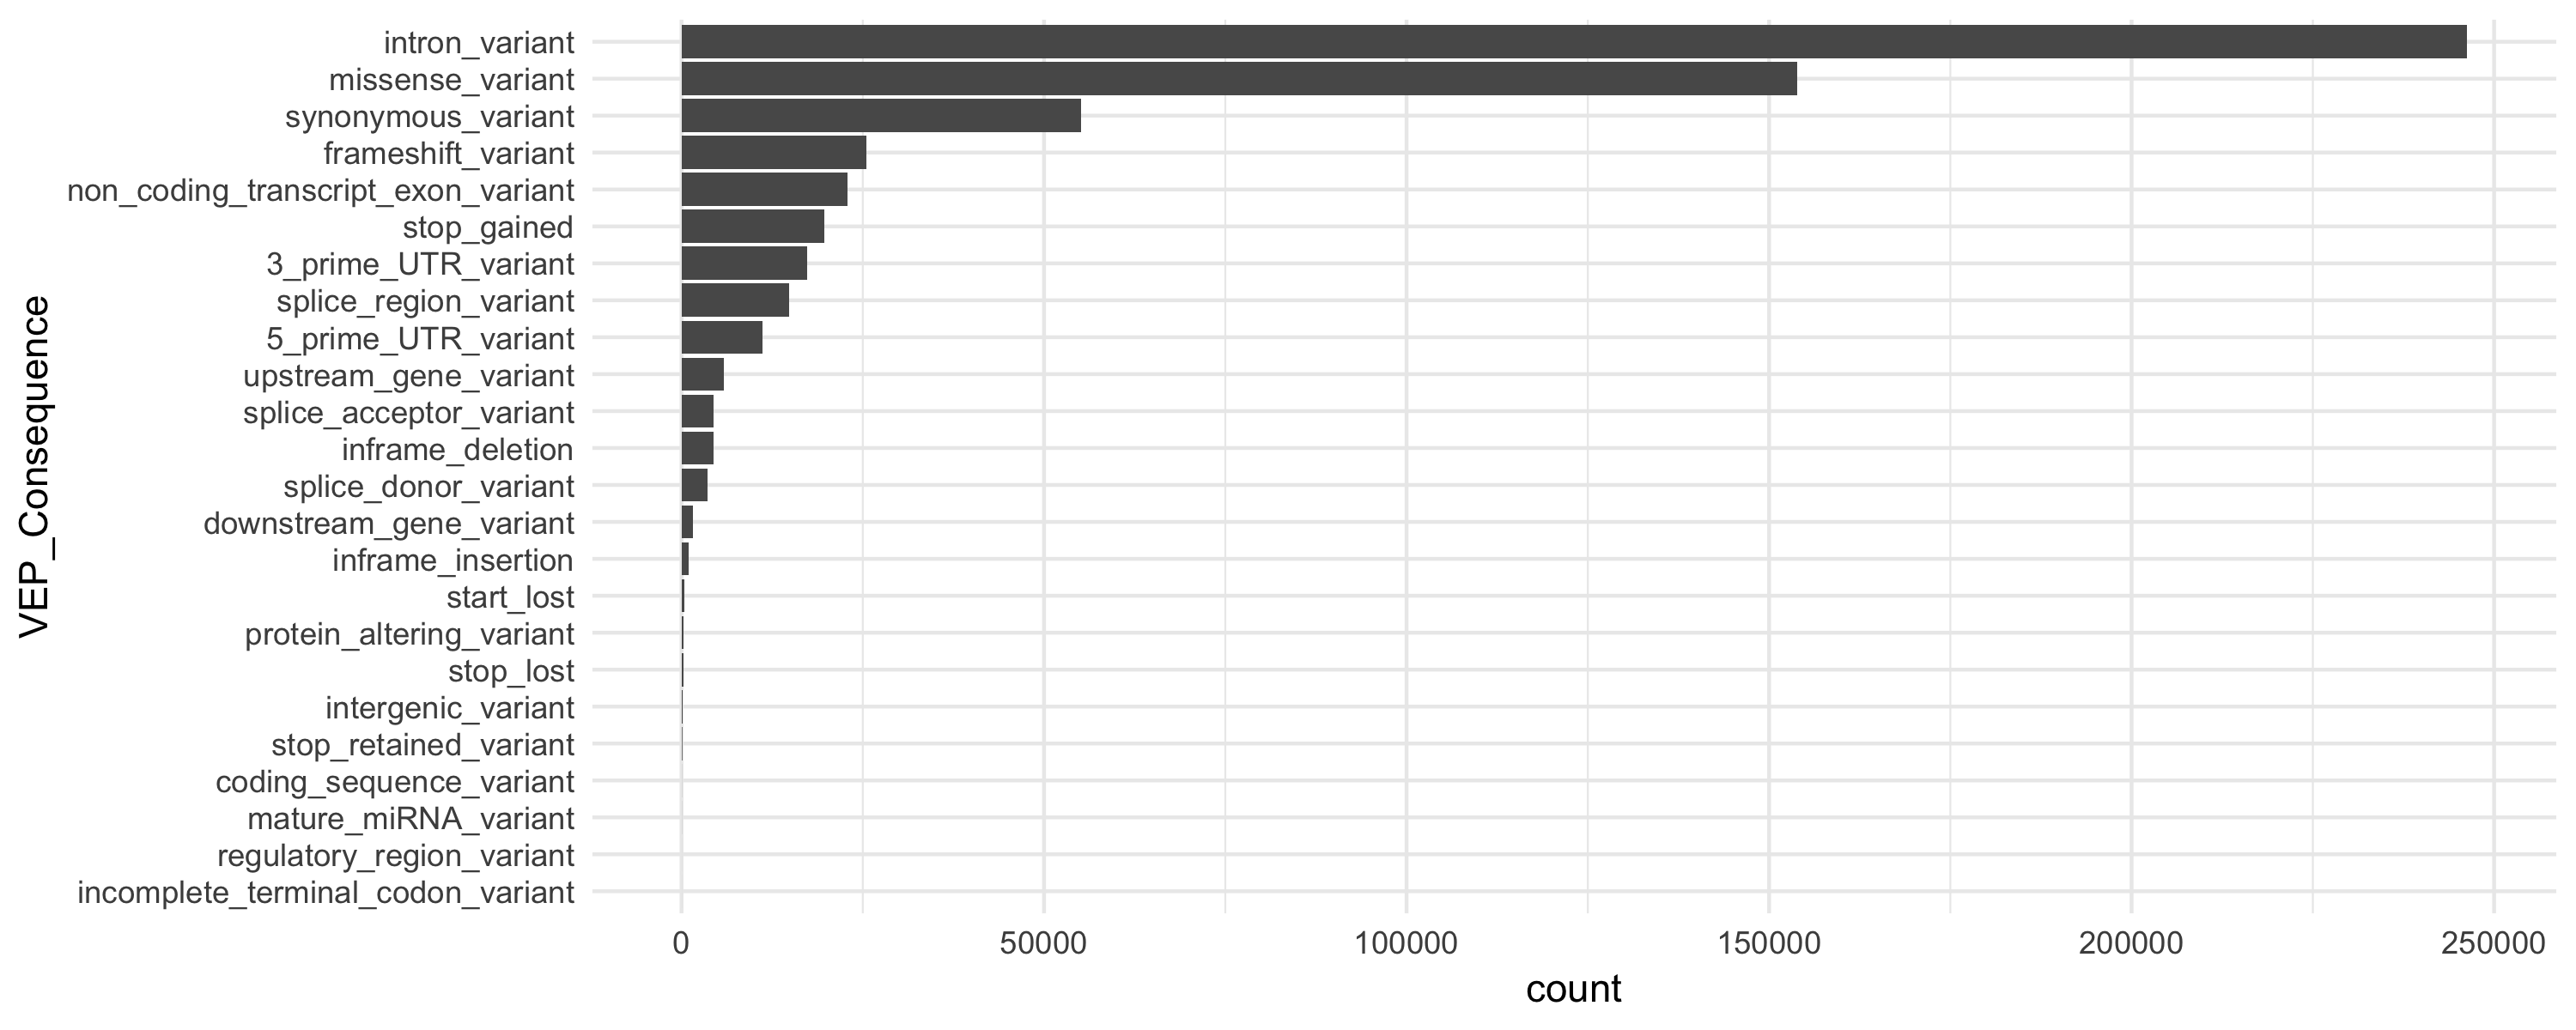

In [65]:
plot_histogram(impact, "VEP_Consequence", height = 4, flip = TRUE)

In [73]:
# [-360,595 rows] remove the non-interesting mutations
impact <- impact[impact$VEP_Consequence %in% c("missense_variant",
                                               "frameshift_variant",
                                               "stop_gained",
                                               "splice_region_variant",
                                               "splice_acceptor_variant",
                                               "inframe_deletion",
                                               "splice_donor_variant",
                                               "inframe_insertion",
                                               "start_lost",
                                               "stop_lost"),]

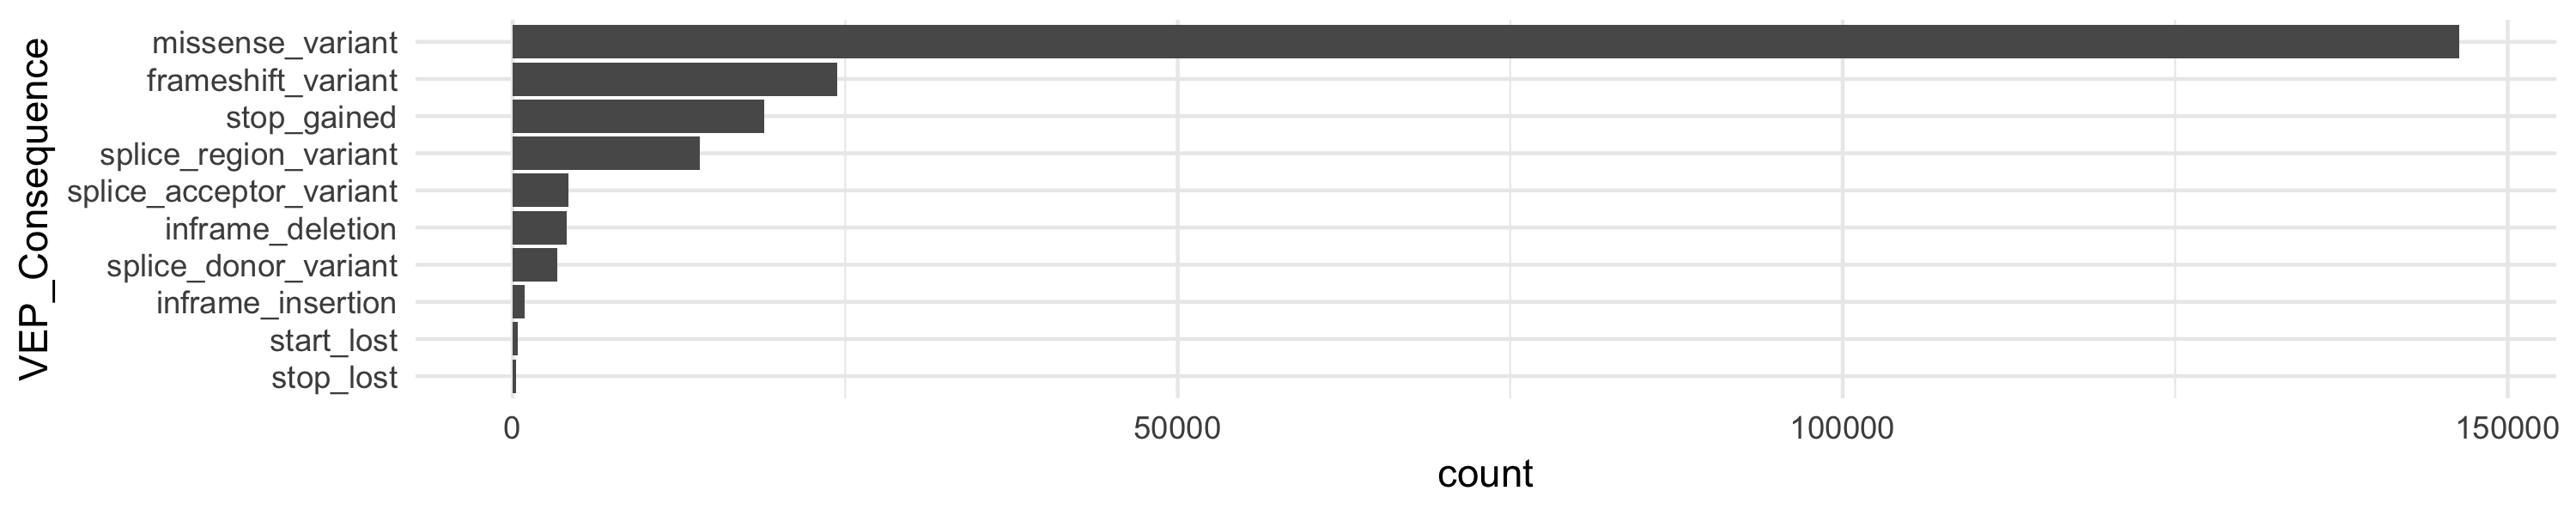

In [90]:
plot_histogram(impact, "VEP_Consequence", height = 2, flip = TRUE)

?? Group Consequence for splicing

In [ ]:
nrow(impact) # it was 588,547 before

### Remove `minor_contamination` > 0.01

In [ ]:
print_count_and_proportion(nrow(impact[impact$minor_contamination > 0.01,]), nrow(impact)) # from custom_tools.R

In [75]:
# [-10,173 rows] remove the contaminated rows
impact <- impact[impact$minor_contamination <= 0.01,]
# [-1 feature] remove the minor_contamination feature
impact["minor_contamination"] <- NULL

### Remove `n_depth` < 20

In [ ]:
nrow(impact[impact$n_depth < 20,])

In [80]:
# [-384 rows] remove the rows having n_depth < 20
impact <- impact[impact$n_depth >= 20,]

### Remove `t_alt_plus_count` + `t_alt_neg_count` != `t_alt_count`

In [ ]:
nrow(impact[impact$t_alt_plus_count + impact$t_alt_neg_count != impact$t_alt_count,])

In [84]:
# [-45 rows] remove the rows having impact$t_alt_plus_count + impact$t_alt_neg_count != impact$t_alt_count
impact <- impact[impact$t_alt_plus_count + impact$t_alt_neg_count == impact$t_alt_count,]

### New features: `mut_key`, `sample_mut_key`

In [83]:
# [+1 feature] create a mutation key feature to idenfity unique mutations
impact$mut_key <- paste(impact$Chromosome,
                        impact$Start_Position,
                        impact$Reference_Allele,
                        impact$Tumor_Seq_Allele2,
                        sep = '_')

In [ ]:
# [+1 feature] create a sample mutation key feature to idenfity unique rows
impact$sample_mut_key <- paste(impact$Tumor_Sample_Barcode, impact$mut_key, sep = '_')

### Modify: `Hugo_Symbol`

### Compare with the old impact

In [110]:
impact_old <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

### Deal with `NA` values

In [50]:
count_na <- function(data) {
    return (sum(is.na(data)))
}

In [51]:
replace_na <- function(data, feature_name, replace_value){
    data[is.na(data[,feature_name]), feature_name] <- replace_value
    
    return (data)
}

#### VEP

In [22]:
for (c in vep_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "  VEP_Consequence: 0"
[1] "       VEP_SYMBOL: 49"
[1] "        VEP_HGVSc: 71"
[1] "        VEP_HGVSp: 8811"
[1] "  VEP_Amino_acids: 8794"
[1] "VEP_VARIANT_CLASS: 0"
[1] "      VEP_BIOTYPE: 49"


49 mutations have `VEP_BIOTYPE` and `VEP_SYMBOL` = `NA`, because they are considered as `intergenic` by VEP.

In [23]:
nrow(impact[is.na(impact$VEP_BIOTYPE) & is.na(impact$VEP_SYMBOL),]) == 49
length(unique(impact$mut_key[is.na(impact$VEP_BIOTYPE)]))
table(impact$VEP_Consequence[is.na(impact$VEP_BIOTYPE)])
table(impact$Consequence[is.na(impact$VEP_BIOTYPE)])

[1] TRUE

[1] 49


intergenic_variant 
                49 


 nonframeshift_deletion nonframeshift_insertion       nonsynonymous_SNV 
                     10                       4                      26 
               splicing            stopgain_SNV 
                      1                       8 

8811 mutations have `VEP_HGVSp` = `NA`, most of them being splicing mutations.

In [24]:
get_table(impact$VEP_Consequence[is.na(impact$VEP_HGVSp)]) %>% filter(count >= 50)
get_table(impact$Consequence[is.na(impact$VEP_HGVSp)])

values,count,freq
splice_acceptor_variant,3063,34.8%
splice_donor_variant,2534,28.8%
splice_region_variant&intron_variant,1101,12.5%
splice_acceptor_variant&coding_sequence_variant&intron_variant,444,5%
splice_donor_variant&coding_sequence_variant&intron_variant,427,4.8%
intron_variant,299,3.4%
splice_donor_variant&coding_sequence_variant,155,1.8%
splice_acceptor_variant&intron_variant,108,1.2%
splice_acceptor_variant&coding_sequence_variant,97,1.1%
splice_acceptor_variant&splice_donor_variant&coding_sequence_variant&intron_variant,90,1%


values,count,freq
splicing,8168,92.7%
nonsynonymous_SNV,229,2.6%
synonymous_SNV,128,1.5%
frameshift_deletion,121,1.4%
nonframeshift_deletion,94,1.1%
stopgain_SNV,35,0.4%
frameshift_insertion,19,0.2%
nonframeshift_insertion,17,0.2%
-- total --,8811,100%


In [25]:
count_na(impact$VEP_Amino_acids)
table(impact$mut_key[is.na(impact$VEP_Amino_acids)] %in% impact$mut_key[is.na(impact$VEP_HGVSp)])

[1] 8794


FALSE  TRUE 
   83  8711 

In [26]:
impact <- replace_na(impact, "VEP_BIOTYPE"    , "unknown")
impact <- replace_na(impact, "VEP_SYMBOL"     , "unknown")
impact <- replace_na(impact, "VEP_HGVSc"      , "unknown")
impact <- replace_na(impact, "VEP_HGVSp"      , "unknown")
impact <- replace_na(impact, "VEP_Amino_acids", "unknown")

#### VEP additional

In [27]:
for (c in vep_add_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "       VEP_IMPACT: 0"
[1] "     VEP_CLIN_SIG: 215110"
[1] "           VEP_AF: 236757"
[1] "       VEP_MAX_AF: 196853"
[1] "  VEP_MAX_AF_POPS: 191563"
[1] "    VEP_gnomAD_AF: 192164"
[1] "         VEP_SIFT: 106989"
[1] "     VEP_PolyPhen: 105935"
[1] "   VEP_COSMIC_CNT: 175548"


`NA` values might correspond to not found, we replace them by `"unknown"` or a null allele value for the numeric variables.

In [28]:
impact <- replace_na(impact, "VEP_CLIN_SIG"  , "unknown")
impact <- replace_na(impact, "VEP_SIFT"      , "unknown")
impact <- replace_na(impact, "VEP_PolyPhen"  , "unknown")
impact <- replace_na(impact, "VEP_COSMIC_CNT", "unknown")

impact <- replace_na(impact, "VEP_AF"         , 0.0)
impact <- replace_na(impact, "VEP_MAX_AF"     , 0.0)
impact <- replace_na(impact, "VEP_MAX_AF_POPS", "unknown")
impact <- replace_na(impact, "VEP_gnomAD_AF"  , 0.0)

### Process raw features

#### `VEP_HGVSc`

In [32]:
dd <- head(impact$VEP_HGVSc, 10)
dd <- data.frame(dd, sapply(dd, function(x) strsplit(x, ':')[[1]][2]), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
ENST00000269305.4:c.766A>C,c.766A>C
ENST00000324856.7:c.4854C>G,c.4854C>G
ENST00000357368.4:c.1452G>C,c.1452G>C
ENST00000262741.5:c.894C>G,c.894C>G
ENST00000350721.4:c.7292G>T,c.7292G>T
ENST00000257290.5:c.1393T>A,c.1393T>A
ENST00000281708.4:c.1237-1G>T,c.1237-1G>T
ENST00000281708.4:c.181G>T,c.181G>T
ENST00000264932.6:c.1444C>T,c.1444C>T
ENST00000399503.3:c.904G>T,c.904G>T


In [33]:
impact$VEP_HGVSc <- sapply(impact$VEP_HGVSc, function(x) strsplit(x, ':')[[1]][2])

#### `VEP_HGVSp`

In [34]:
get_HGVSp_from_vep <- function(HGVSp_string) {
    
    if (HGVSp_string == "unknown")
        return ("unknown")
    
    HGVSp_string <- strsplit(HGVSp_string, ':')[[1]][2]
    
    protein_long_name <- c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Glu', 'Gln', 'Gly', 'His', 'Ile', 'Leu', 'Lys',
                           'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
    protein_short_name <- c('A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K',
                            'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V')
    
    for (name in protein_long_name)
        HGVSp_string <- gsub(name, protein_short_name[match(name, protein_long_name)], HGVSp_string)
    
    HGVSp_string <- gsub('Ter', '*', HGVSp_string)
    HGVSp_string <- gsub('%3D', '=', HGVSp_string)
    
    return (HGVSp_string)
}

In [35]:
dd <- head(impact$VEP_HGVSp, 10)
dd <- data.frame(dd, sapply(dd, get_HGVSp_from_vep), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
ENSP00000269305.4:p.Thr256Pro,p.T256P
ENSP00000320485.7:p.Pro1618%3D,p.P1618=
ENSP00000349932.4:p.Leu484%3D,p.L484=
ENSP00000262741.5:p.Ile298Met,p.I298M
ENSP00000343741.4:p.Arg2431Met,p.R2431M
ENSP00000257290.5:p.Leu465Met,p.L465M
unknown,unknown
ENSP00000281708.3:p.Gly61Ter,p.G61*
ENSP00000264932.6:p.Pro482Ser,p.P482S
ENSP00000382423.3:p.Glu302Ter,p.E302*


In [36]:
impact$VEP_HGVSp <- sapply(impact$VEP_HGVSp, get_HGVSp_from_vep)

#### `VEP_SIFT`

In [37]:
dd <- head(unique(impact$VEP_SIFT), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(x, '\\(')[[1]][1]),
                 sapply(dd, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2]))),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2")
dd

old,new1,new2
deleterious(0),deleterious,0.00
unknown,unknown,NA
deleterious(0.01),deleterious,0.01
tolerated_low_confidence(0.12),tolerated_low_confidence,0.12
tolerated(0.4),tolerated,0.40
tolerated(0.17),tolerated,0.17
deleterious(0.02),deleterious,0.02
deleterious_low_confidence(0),deleterious_low_confidence,0.00
tolerated_low_confidence(0.1),tolerated_low_confidence,0.10
tolerated(0.08),tolerated,0.08


In [38]:
impact$VEP_SIFT_class <- sapply(impact$VEP_SIFT, function(x) strsplit(x, '\\(')[[1]][1])
impact$VEP_SIFT_score <- sapply(impact$VEP_SIFT, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
impact$VEP_SIFT <- NULL

#### `VEP_PolyPhen`

In [39]:
dd <- head(unique(impact$VEP_PolyPhen), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(x, '\\(')[[1]][1]),
                 sapply(dd, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2]))),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2")
dd

old,new1,new2
probably_damaging(0.999),probably_damaging,0.999
unknown,unknown,NA
benign(0.277),benign,0.277
probably_damaging(0.997),probably_damaging,0.997
probably_damaging(0.965),probably_damaging,0.965
benign(0.005),benign,0.005
probably_damaging(0.952),probably_damaging,0.952
possibly_damaging(0.738),possibly_damaging,0.738
probably_damaging(0.995),probably_damaging,0.995
possibly_damaging(0.472),possibly_damaging,0.472


In [40]:
impact$VEP_PolyPhen_class <- sapply(impact$VEP_PolyPhen, function(x) strsplit(x, '\\(')[[1]][1])
impact$VEP_PolyPhen_score <- sapply(impact$VEP_PolyPhen, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
impact$VEP_PolyPhen <- NULL

#### `VEP_COSMIC_CNT`

In [41]:
get_cosmic_count <- function(cosmic_cnt_string) {
    if (cosmic_cnt_string == "unknown")
        return (0)
    else
        return (sum(as.numeric(strsplit(cosmic_cnt_string, '&')[[1]])))
}

dd <- head(unique(impact$VEP_COSMIC_CNT), 10)
dd <- data.frame(dd, sapply(dd, get_cosmic_count), row.names = NULL)
colnames(dd) <- c("old", "new1")
dd

old,new1
1,1
unknown,0
1&1&1&1&1&1,6
1&1&1,3
1&1,2
53,53
158,158
19&21&14,54
229&230&200&230&179&789,1857
42&170,212


In [42]:
impact$VEP_COSMIC <- sapply(impact$VEP_COSMIC, get_cosmic_count)

In [43]:
impact_backup <- impact